In [15]:
# Import Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot
import seaborn
seaborn.set(style='ticks')

In [16]:
# Read CSV files to DataFrames
income_path = "county_income_df.csv"
mean_score_path = "Mean_Overall_Ratings_perCounty.csv"
std_score_path = "StdDev_Overall_Ratings_perCounty.csv"
mean_score_df = pd.read_csv(mean_score_path)
std_score_df = pd.read_csv(std_score_path)
full_income_df = pd.read_csv(income_path)

In [17]:
# Make the county name formats match
mean_score_df['County Name'] = mean_score_df['County Name'].str.lower()
mean_score_df['County Name'] = mean_score_df['County Name'].str.title()
mean_score_df = mean_score_df.rename(columns={'County Name':'County'})
std_score_df['County Name'] = std_score_df['County Name'].str.lower()
std_score_df['County Name'] = std_score_df['County Name'].str.title()
std_score_df = std_score_df.rename(columns={'County Name':'County'})
income_df = full_income_df[['County','Household Income','Population']]
income_df = income_df.dropna(subset=['County'])

In [18]:
# Merge dataframes
scatter_df = pd.merge(mean_score_df,income_df,on='County')

In [19]:
# Add regions to dataframe
northern = ["Del Norte","Siskiyou","Modoc","Humboldt","Trinity","Shasta",
            "Lassen","Mendocino","Tehama","Plumas","Lake","Glenn","Colusa",
            "Butte"]
bay_area = ["Sonoma","Napa","Marin","Solano","Contra Costa","San Francisco",
            "San Mateo","Alameda","Santa Cruz","Santa Clara","San Benito",
            "Monterey"]
mountain_valley = ["Inyo","Mono","Tuolumne","Alpine","Calaveras","Amador",
                   "El Dorado","Sacramento","Placer","Nevada","Sierra",
                   "Yuba","Sutter","Yolo"]
central_valley = ["San Joaquin","Stanislaus","Merced","Mariposa","Madera",
                  "Fresno","Kings","Tulare","San Luis Obispo","Kern"]
southern = ["Santa Barbara","Ventura","Los Angeles","San Bernardino",
            "Orange","Riverside","San Diego","Imperial"]
regions = []
for county in scatter_df['County']:
    if county in northern:
        regions.append("Northern Region")
    elif county in bay_area:
        regions.append("Bay Area Region")
    elif county in mountain_valley:
        regions.append("Mountain Valley Region")
    elif county in central_valley:
        regions.append("Central Valley Region")
    elif county in southern:
        regions.append("Southern Region")
    else:
        regions.append("NaN")
scatter_df["Regions"] = regions


std_scatter_df = pd.merge(scatter_df,std_score_df,on='County')
std_scatter_df.head()

,County,Overall_Hos_Rating,Household Income,Population,Regions,Std_Dev_Overall_Rating
0,Alameda,3.08,76996.0,1610921.0,Bay Area Region,0.67
1,Butte,3.00,42302.0,224241.0,Northern Region,2.00
2,Contra Costa,3.00,80338.0,1111339.0,Bay Area Region,1.00
3,El Dorado,4.00,70235.0,183087.0,Mountain Valley Region,0.00
4,Fresno,3.67,43338.0,965974.0,Central Valley Region,0.82


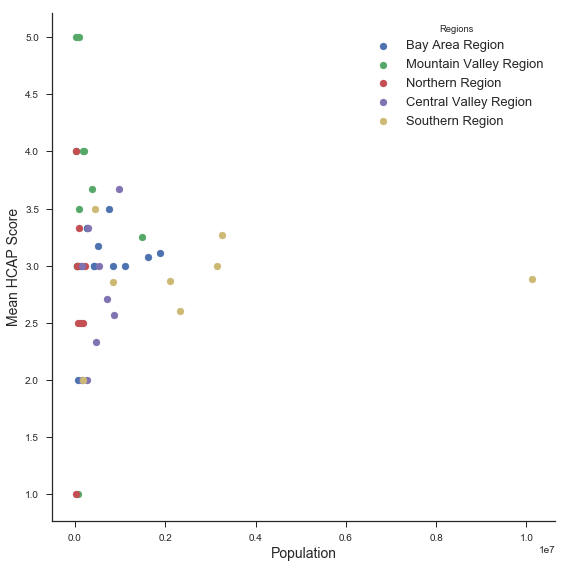

In [20]:
# Plot mean HCAP Score vs Population
fg = seaborn.FacetGrid(data=scatter_df, hue='Regions',size=8,aspect=1,legend_out=False)
fg.map(pyplot.scatter, 'Population', 'Overall_Hos_Rating').add_legend(fontsize=13)
plt.xlabel("Population",fontsize=14)
plt.ylabel("Mean HCAP Score",fontsize=14)
plt.savefig("mean_HCAP_Score_VS_population.png")
plt.show()

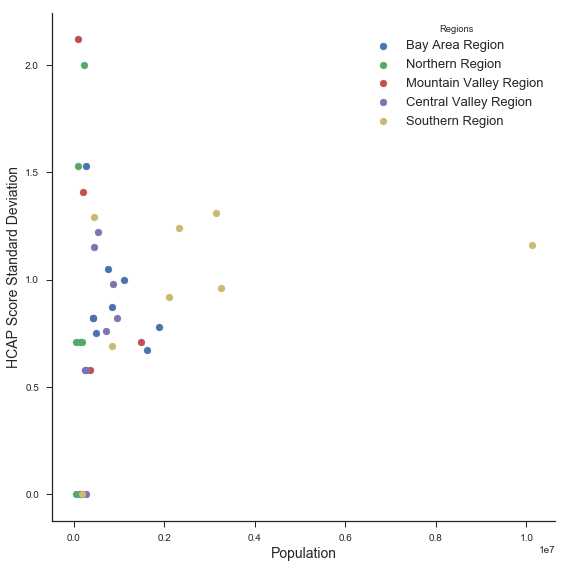

In [21]:
# Plot Std HCAP Score vs Population
fg = seaborn.FacetGrid(data=std_scatter_df, hue='Regions',size=8,aspect=1,legend_out=False)
fg.map(pyplot.scatter, 'Population', 'Std_Dev_Overall_Rating').add_legend(fontsize=13)
plt.xlabel("Population",fontsize=14)
plt.ylabel("HCAP Score Standard Deviation",fontsize=14)
plt.savefig("Std_HCAP_Score_VS_population.png")
plt.show()

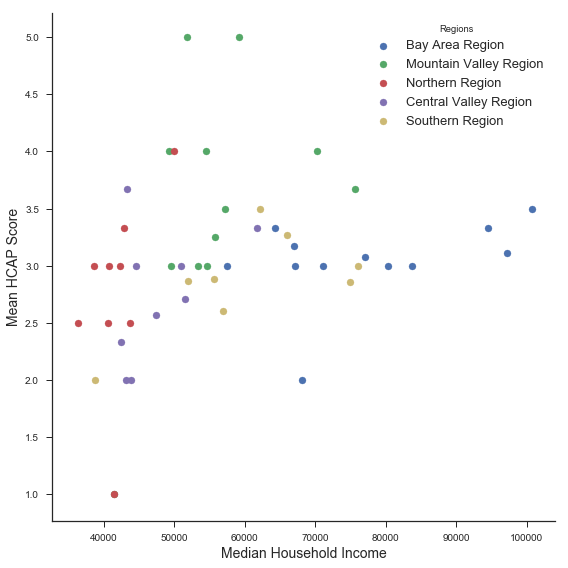

In [22]:
# Plot mean HCAP Score vs income
fg = seaborn.FacetGrid(data=scatter_df, hue='Regions',size=8,aspect=1,legend_out=False)
fg.map(pyplot.scatter, 'Household Income', 'Overall_Hos_Rating').add_legend(fontsize=13)
plt.xlabel("Median Household Income",fontsize=14)
plt.ylabel("Mean HCAP Score",fontsize=14)
plt.savefig("mean_HCAP_Score_VS_income.png")
plt.show()

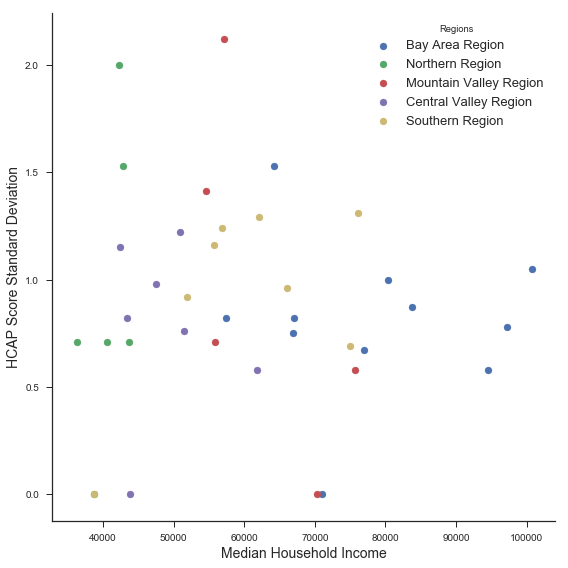

In [23]:
# Plot Std HCAP Score vs income
fg = seaborn.FacetGrid(data=std_scatter_df, hue='Regions',size=8,aspect=1,legend_out=False)
fg.map(pyplot.scatter, 'Household Income', 'Std_Dev_Overall_Rating').add_legend(fontsize=13)
plt.xlabel("Median Household Income",fontsize=14)
plt.ylabel("HCAP Score Standard Deviation",fontsize=14)
plt.savefig("Std_HCAP_Score_VS_income.png")
plt.show()